In [ ]:
# ..... try integration with scanorama ..... #

In [1]:
import scanorama
import scanpy 
import pandas as pd
import numpy as np

In [3]:
# # List of datasets:
adata1 = scanpy.read_h5ad("stage23_sample3_hvg.h5ad")
adata2 = scanpy.read_h5ad("stage23_sample10_hvg.h5ad")

adata3 = scanpy.read_h5ad("stage28_sample5_hvg.h5ad")
adata4 = scanpy.read_h5ad("stage28_sample10_hvg.h5ad")
adata5 = scanpy.read_h5ad("stage28_sample11_hvg.h5ad")

adata6 = scanpy.read_h5ad("stage32_sample5_hvg.h5ad")
adata7 = scanpy.read_h5ad("stage32_sample10_hvg.h5ad")
adata8 = scanpy.read_h5ad("stage32_sample12_hvg.h5ad")

# List of datasets:
adatas = [ adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8 ]

adatas

[AnnData object with n_obs × n_vars = 6271 × 2000
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'dataset', 'consensus_type', 'integrated_snn_res.1', 'seurat_clusters'
     var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'vf_vst_counts_variable', 'vf_vst_counts_rank', 'var.features', 'var.features.rank',
 AnnData object with n_obs × n_vars = 8287 × 2000
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'dataset', 'consensus_type', 'integrated_snn_res.1', 'seurat_clusters'
     var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'vf_vst_counts_variable', 'vf_vst_counts_rank', 'var.features', 'var.features.rank',
 AnnData object with n_obs × n_vars = 7121 × 2000
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'dataset', 'consensus_type', 'integrated_snn_res.1', 'seurat_clusters'
     var

In [4]:
# Integration and Batch-correction
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred = True)

Found 2000 genes among all datasets
[[0.         0.34946301 0.73640568 0.09812325 0.57837665 0.00581629
  0.00173123 0.00159464]
 [0.         0.         0.1378062  0.56361756 0.07336793 0.05134376
  0.01363582 0.03233981]
 [0.         0.         0.         0.29658638 0.79427047 0.01644605
  0.00562649 0.00811327]
 [0.         0.         0.         0.         0.22639279 0.47051745
  0.11467415 0.15206147]
 [0.         0.         0.         0.         0.         0.11191336
  0.03462454 0.0292714 ]
 [0.         0.         0.         0.         0.         0.
  0.7374649  0.76654633]
 [0.         0.         0.         0.         0.         0.
  0.         0.74918849]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (2, 4)
Processing datasets (5, 7)
Processing datasets (6, 7)
Processing datasets (5, 6)
Processing datasets (0, 2)
Processing datasets (0, 4)
Processing datasets (1, 3)
Processing datasets (3, 5)
Processing datasets (0, 1)


In [5]:
adata_corrected = scanpy.concat(
    adatas_cor,
    label="library_id",
    uns_merge="unique",    
    index_unique="-",
)

In [6]:
adata_corrected

AnnData object with n_obs × n_vars = 50547 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'dataset', 'consensus_type', 'integrated_snn_res.1', 'seurat_clusters', 'library_id'
    obsm: 'X_scanorama'

In [7]:
scanpy.pp.neighbors(adata_corrected, use_rep="X_scanorama")
scanpy.tl.umap(adata_corrected)
scanpy.tl.leiden(
    adata_corrected, key_added="clusters", n_iterations=2
)

/home/suresh/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_574136/1345977453.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  scanpy.tl.leiden(


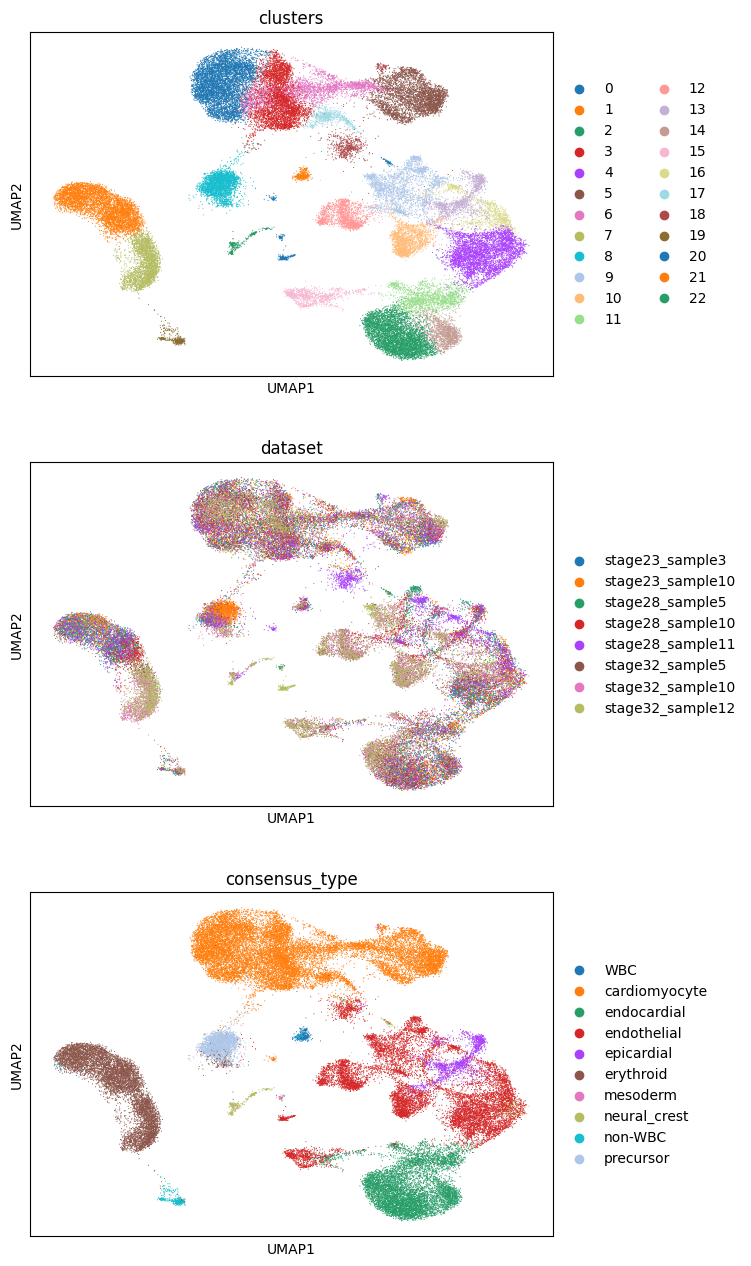

In [9]:
scanpy.pl.umap(
    adata_corrected, color=["clusters", "dataset", "consensus_type"], palette=scanpy.pl.palettes.default_20, ncols=1
)

In [10]:
# save anndata object
adata_corrected.write_h5ad('chicken_scanorama.h5ad')

# save embeddings and clusters from Scanorama
np.savetxt('chicken_scanorama_pca.csv', adata_corrected.obsm['X_scanorama'], delimiter=",")
np.savetxt('chicken_scanorama_umap.csv', adata_corrected.obsm['X_umap'], delimiter=",")
pd.DataFrame(adata_corrected.obs['clusters']).to_csv('chicken_scanorama_clusters.csv')

In [3]:
adata1 = scanpy.read_h5ad("chicken_scanorama.h5ad")

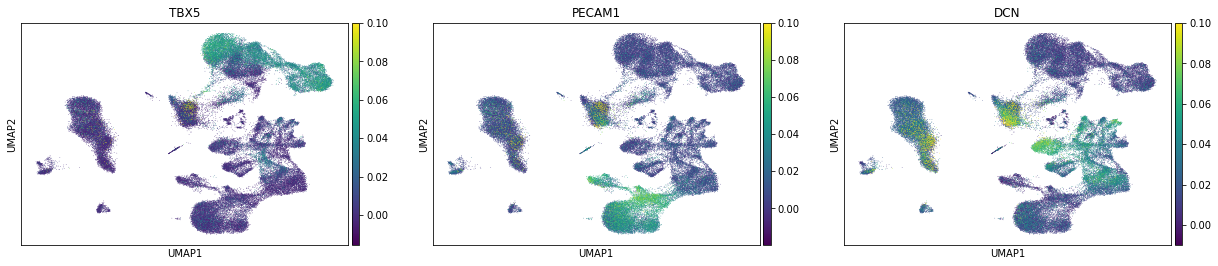

In [8]:
scanpy.pl.umap(adata1, color=["TBX5", "PECAM1", "DCN"], vmax = 0.1,
              save='aa-lizard_exp.png')